Jamison Hunter

August 11, 2023

# Chicago Crime Data Analysis

In [1]:
# Imports
import os
import glob
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# setting the style for seaborn graphs
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])

In [3]:
# get list of files from folder
crime_files = sorted(glob.glob("Data/Chicago/"+"*.csv"))
df = pd.concat([pd.read_csv(f, nrows=7) for f in crime_files])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 0 to 6
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    161 non-null    int64  
 1   Date                  161 non-null    object 
 2   Primary Type          161 non-null    object 
 3   Description           161 non-null    object 
 4   Location Description  161 non-null    object 
 5   Arrest                161 non-null    bool   
 6   Domestic              161 non-null    bool   
 7   Beat                  161 non-null    int64  
 8   District              161 non-null    float64
 9   Ward                  148 non-null    float64
 10  Latitude              148 non-null    float64
 11  Longitude             148 non-null    float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 14.2+ KB


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1584605,01/01/2001 01:00:00 AM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1434,14.0,NaN,41.915639,-87.688701
1,1311626,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1033,10.0,NaN,41.848786,-87.704087
2,1310610,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,41.944854,-87.684418
3,1310586,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,911,9.0,NaN,41.798298,-87.692856
4,1315701,01/01/2001 01:00:00 PM,BATTERY,AGGRAVATED: HANDGUN,RESIDENCE,False,False,1132,11.0,NaN,41.866421,-87.725046


In [4]:
path_1 = r"Data/Chicago/Chicago-Crime_2017.csv"
path_2 = r"Data/Chicago/Chicago-Crime_2018.csv"
path_3 = r"Data/Chicago/Chicago-Crime_2019.csv"
path_4 = r"Data/Chicago/Chicago-Crime_2020.csv"
path_5 = r"Data/Chicago/Chicago-Crime_2021.csv"
path_6 = r"Data/Chicago/Chicago-Crime_2022.csv"

In [5]:
df_1 = pd.read_csv(path_1)
df_2 = pd.read_csv(path_2)
df_3 = pd.read_csv(path_3)
df_4 = pd.read_csv(path_4)
df_5 = pd.read_csv(path_5)
df_6 = pd.read_csv(path_6)
df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6])

In [6]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458937 entries, 0 to 238759
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ID                    1458937 non-null  int64  
 1   Date                  1458937 non-null  object 
 2   Primary Type          1458937 non-null  object 
 3   Description           1458937 non-null  object 
 4   Location Description  1452223 non-null  object 
 5   Arrest                1458937 non-null  bool   
 6   Domestic              1458937 non-null  bool   
 7   Beat                  1458937 non-null  int64  
 8   District              1458936 non-null  float64
 9   Ward                  1458887 non-null  float64
 10  Latitude              1432026 non-null  float64
 11  Longitude             1432026 non-null  float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 125.2+ MB


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,10804257,01/01/2017 01:00:00 AM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,2535,25.0,26.0,41.916211,-87.721638
1,10801506,01/01/2017 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1212,12.0,32.0,41.899408,-87.685099
2,10802618,01/01/2017 01:00:00 PM,THEFT,$500 AND UNDER,STREET,False,False,1225,12.0,2.0,41.876805,-87.678946
3,10801159,01/01/2017 01:00:00 AM,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,1935,19.0,43.0,41.927560,-87.641657
4,10801859,01/01/2017 01:00:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True,433,4.0,10.0,41.658235,-87.538682


In [7]:
df["Primary Type"].unique()

array(['OTHER OFFENSE', 'CRIMINAL DAMAGE', 'THEFT', 'BATTERY',
       'SEX OFFENSE', 'DECEPTIVE PRACTICE', 'CRIM SEXUAL ASSAULT',
       'MOTOR VEHICLE THEFT', 'ASSAULT', 'BURGLARY',
       'CRIMINAL SEXUAL ASSAULT', 'PUBLIC PEACE VIOLATION',
       'WEAPONS VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'CRIMINAL TRESPASS', 'NARCOTICS', 'ROBBERY',
       'OFFENSE INVOLVING CHILDREN', 'HOMICIDE', 'KIDNAPPING',
       'OBSCENITY', 'HUMAN TRAFFICKING', 'INTIMIDATION', 'ARSON',
       'STALKING', 'CONCEALED CARRY LICENSE VIOLATION', 'PROSTITUTION',
       'NON-CRIMINAL', 'LIQUOR LAW VIOLATION', 'PUBLIC INDECENCY',
       'GAMBLING', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'OTHER NARCOTIC VIOLATION', 'RITUALISM'], dtype=object)

In [8]:
df["District"].unique()

array([25., 12., 19.,  4., 22., 10., 15.,  2., 17., 18., 24.,  7.,  6.,
       14.,  9.,  5.,  8.,  1.,  3., 16., 11., 20., 31., nan])

# Comparing Police Districts

I want to know which police distric has the most crime and which has the least crime overall.

Text(0.5, 0, 'Number of Crimes')

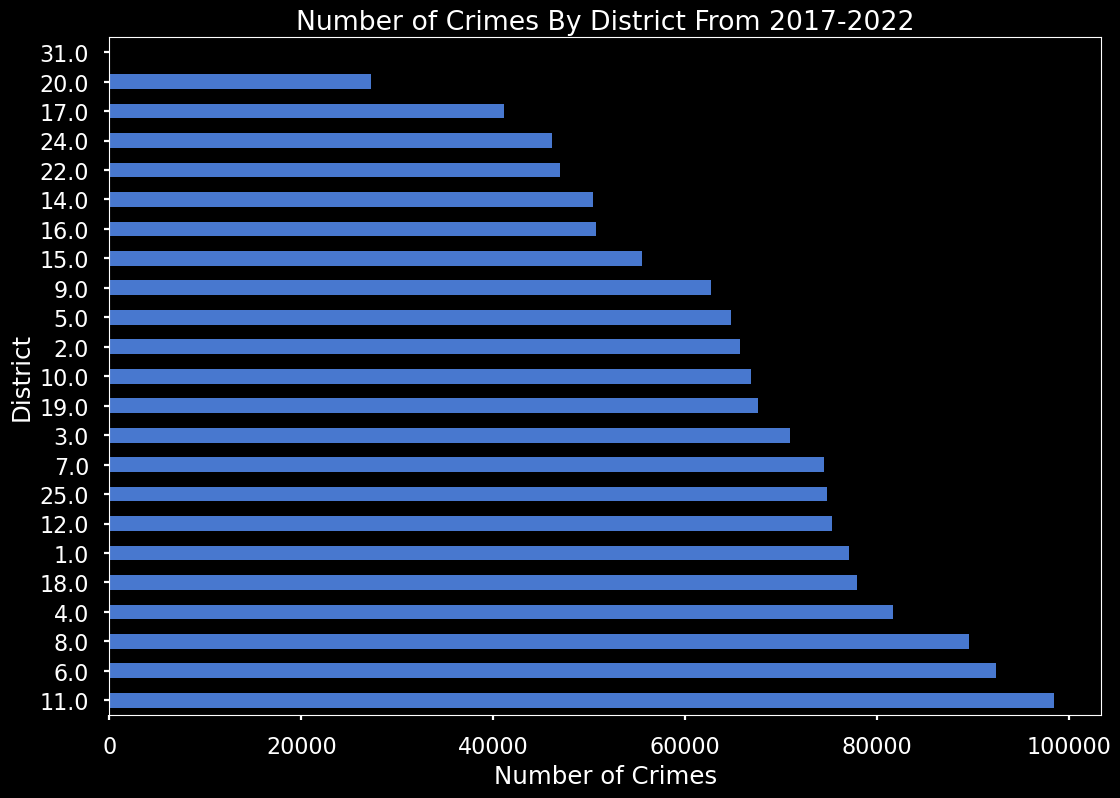

In [9]:
ax = df["District"].value_counts().plot(kind = "barh")
ax.set_title("Number of Crimes By District From 2017-2022")
ax.set_ylabel("District")
ax.set_xlabel("Number of Crimes")

In [10]:
df_11 = df["District"] == 11
df[df_11].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98490 entries, 56 to 238758
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    98490 non-null  int64  
 1   Date                  98490 non-null  object 
 2   Primary Type          98490 non-null  object 
 3   Description           98490 non-null  object 
 4   Location Description  98290 non-null  object 
 5   Arrest                98490 non-null  bool   
 6   Domestic              98490 non-null  bool   
 7   Beat                  98490 non-null  int64  
 8   District              98490 non-null  float64
 9   Ward                  98490 non-null  float64
 10  Latitude              95925 non-null  float64
 11  Longitude             95925 non-null  float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 8.5+ MB


In [11]:
df_31 = df["District"] == 31
df[df_31].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 8924 to 232591
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    55 non-null     int64  
 1   Date                  55 non-null     object 
 2   Primary Type          55 non-null     object 
 3   Description           55 non-null     object 
 4   Location Description  55 non-null     object 
 5   Arrest                55 non-null     bool   
 6   Domestic              55 non-null     bool   
 7   Beat                  55 non-null     int64  
 8   District              55 non-null     float64
 9   Ward                  54 non-null     float64
 10  Latitude              55 non-null     float64
 11  Longitude             55 non-null     float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 4.8+ KB


Based on the above graph, we can see that the district with the most crime from 2017 to 2022 is District 11 while the district with the least crime is District 31. The graph actually depicts such a small number of crimes that I had to double check that the number of crimes was being properly read above.

# Annual Crime Trends

* Is the total number of crimes increasing or decreasing across the years?
* Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [12]:
time = df.copy()
time["Date"] = pd.to_datetime(time['Date'])
time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458937 entries, 0 to 238759
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   ID                    1458937 non-null  int64         
 1   Date                  1458937 non-null  datetime64[ns]
 2   Primary Type          1458937 non-null  object        
 3   Description           1458937 non-null  object        
 4   Location Description  1452223 non-null  object        
 5   Arrest                1458937 non-null  bool          
 6   Domestic              1458937 non-null  bool          
 7   Beat                  1458937 non-null  int64         
 8   District              1458936 non-null  float64       
 9   Ward                  1458887 non-null  float64       
 10  Latitude              1432026 non-null  float64       
 11  Longitude             1432026 non-null  float64       
dtypes: bool(2), datetime64[ns](1), float64(4), 

In [13]:
time = time.set_index('Date')

In [14]:
time["Crime"] = True

In [33]:
ts = time.resample("M").sum()
ts

,ID,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Crime
Date,,,,,,,,,
2017-01-31,239760224915,4288,3423,25810045,252999.0,511488.0,911540.326537,-1.909862e+06,22171
2017-02-28,209372950058,4082,2981,22280679,218382.0,449227.0,801036.024681,-1.678308e+06,19324
2017-03-31,223709270188,4406,3400,23375158,229046.0,471824.0,852974.848556,-1.787176e+06,20580
2017-04-30,236631986614,4543,3679,24528881,240286.0,498086.0,899140.425248,-1.883937e+06,21709
2017-05-31,255717469877,4878,3865,26665452,261263.0,541574.0,969868.843599,-2.032113e+06,23395
...,...,...,...,...,...,...,...,...,...
2022-08-31,284388999780,2503,3890,25806535,252964.0,521297.0,916076.383519,-1.919223e+06,22284
2022-09-30,285384908979,2432,3557,25904318,253926.0,521189.0,915782.425234,-1.918619e+06,22310
2022-10-31,297377338030,2239,3533,27078536,265438.0,544450.0,950270.028890,-1.990902e+06,23178


Text(0.5, 1.0, 'Monthly Domestics In Chicago')

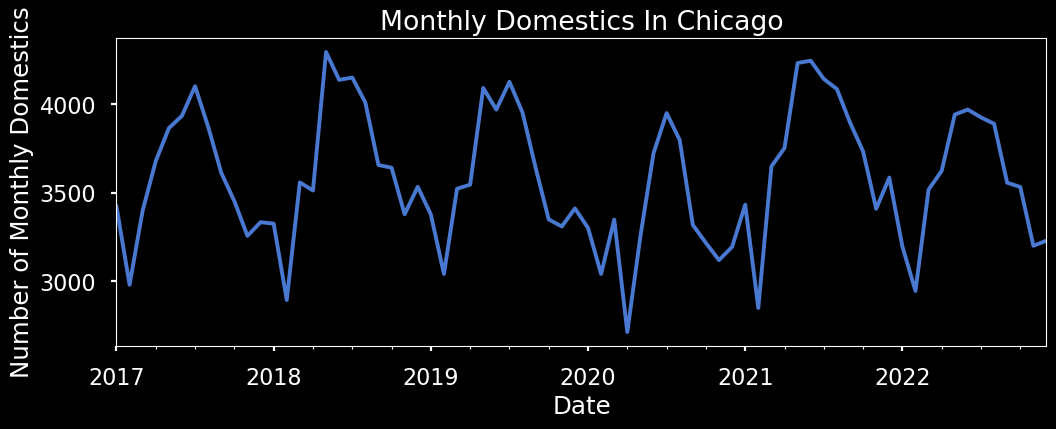

In [34]:
ax = ts["Domestic"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Domestics")
ax.set_title("Monthly Domestics In Chicago")

Text(0.5, 1.0, 'Monthly Arrests In Chicago')

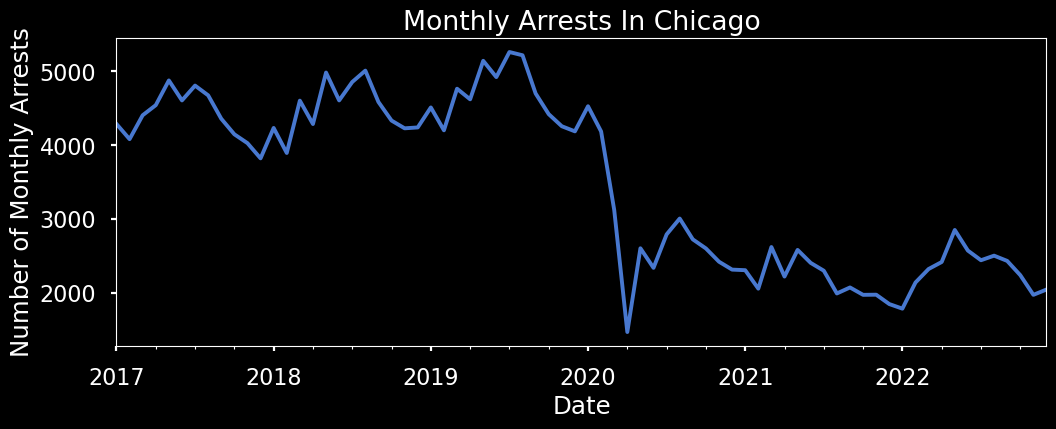

In [35]:
ax = ts["Arrest"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Arrests")
ax.set_title("Monthly Arrests In Chicago")

Text(0.5, 1.0, 'Monthly Crimes In Chicago')

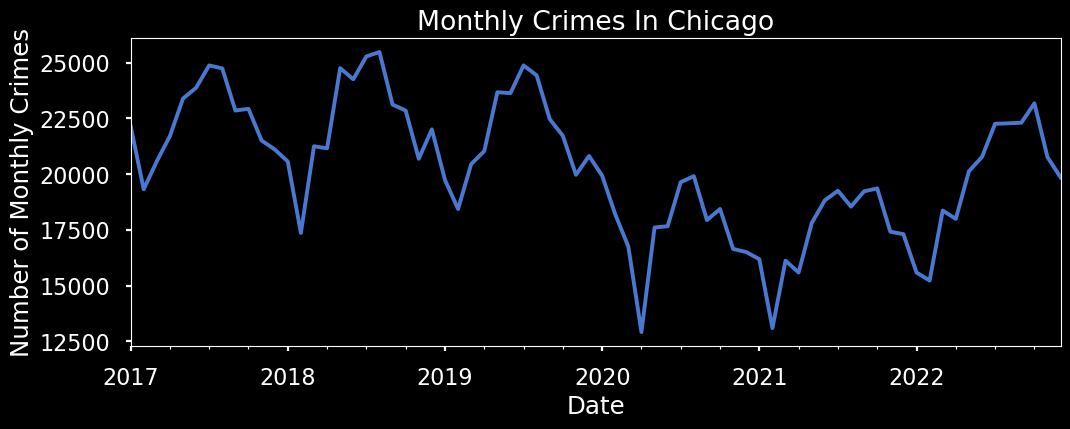

In [36]:
ax = ts["Crime"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Crimes")
ax.set_title("Monthly Crimes In Chicago")

As can be seen above, crime rates don't seem to be changing much overall between the years 2017 and 2022. Though, the number of arrests is decreasing, which is interesting to make a note of. Perhaps I will explore this in more detail later.

# Monthly Crime Trends

* What months have the most crime? What months have the least?
* Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [19]:
ts = time.loc["2022"].resample("M").sum()
ts

,ID,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Crime
Date,,,,,,,,,
2022-01-31,195810055944,1785,3197,17841551,174827.0,361087.0,641177.638846,-1.343328e+06,15592
2022-02-28,191728900842,2139,2946,17524279,171751.0,354116.0,624448.395031,-1.308299e+06,15231
2022-03-31,231931910485,2322,3518,21023844,206000.0,427254.0,750819.438229,-1.573050e+06,18373
2022-04-30,227494646410,2417,3624,20624644,202115.0,417033.0,743062.957041,-1.556832e+06,17997
2022-05-31,255007968438,2851,3942,23351257,228891.0,472611.0,833196.103930,-1.745581e+06,20134
2022-06-30,263689505389,2572,3970,23934244,234556.0,486374.0,855522.532776,-1.792271e+06,20774
2022-07-31,283402729226,2441,3926,25286934,247745.0,529258.0,916790.804372,-1.920588e+06,22263
2022-08-31,284388999780,2503,3890,25806535,252964.0,521297.0,916076.383519,-1.919223e+06,22284
2022-09-30,285384908979,2432,3557,25904318,253926.0,521189.0,915782.425234,-1.918619e+06,22310


Text(0.5, 1.0, 'Monthly Crimes In Chicago 2022')

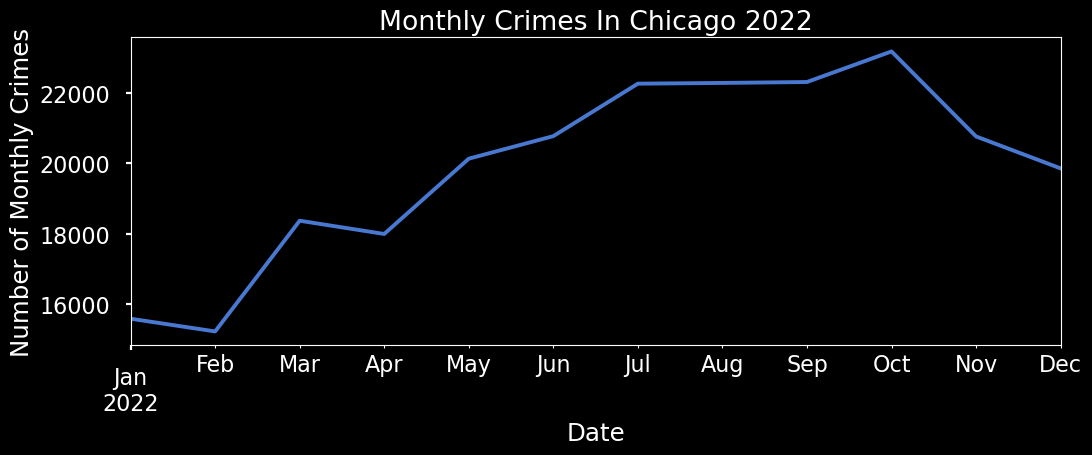

In [20]:
ax = ts["Crime"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Crimes")
ax.set_title("Monthly Crimes In Chicago 2022")

Text(0.5, 1.0, 'Monthly Crimes In Chicago 2021')

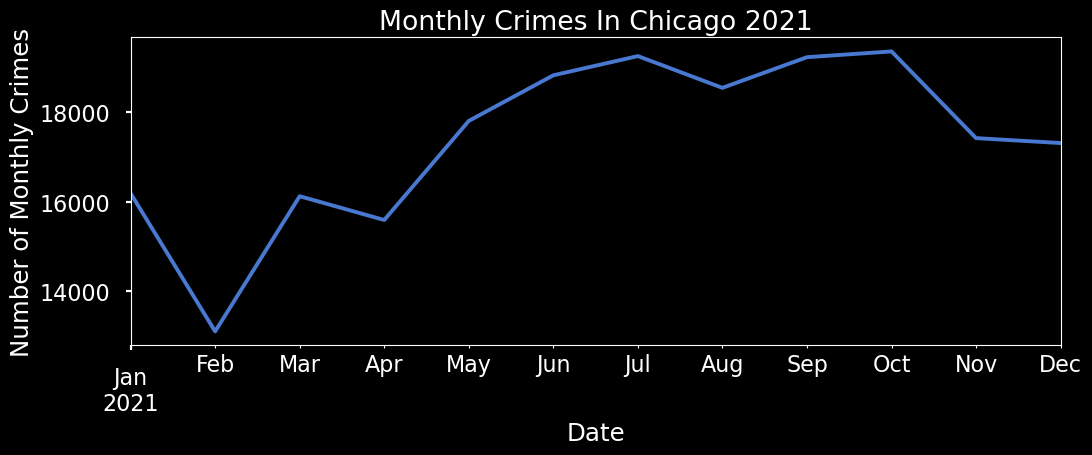

In [21]:
year = 2021

ts = time.loc[f"{year}"].resample("M").sum()
ax = ts["Crime"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Crimes")
ax.set_title(f"Monthly Crimes In Chicago {year}")

Text(0.5, 1.0, 'Monthly Crimes In Chicago 2020')

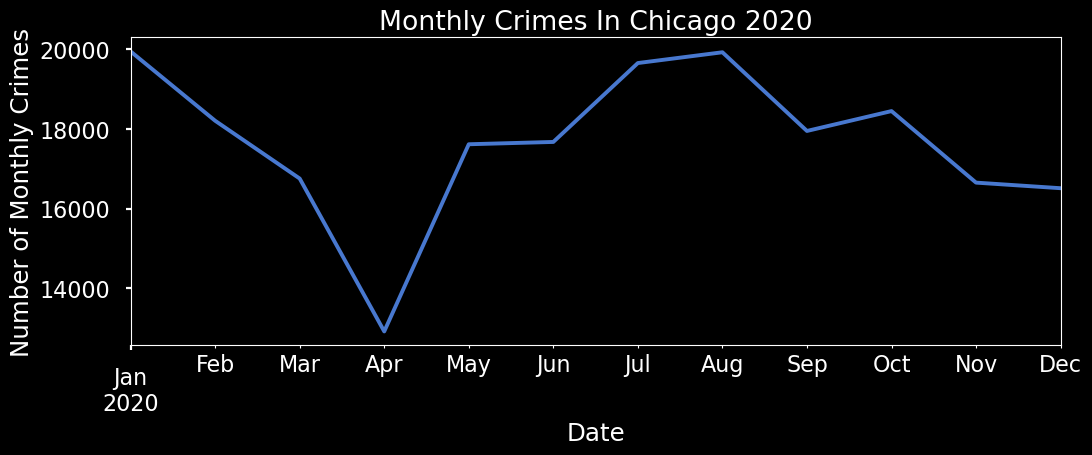

In [22]:
year = 2020

ts = time.loc[f"{year}"].resample("M").sum()
ax = ts["Crime"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Crimes")
ax.set_title(f"Monthly Crimes In Chicago {year}")

Text(0.5, 1.0, 'Monthly Crimes In Chicago 2019')

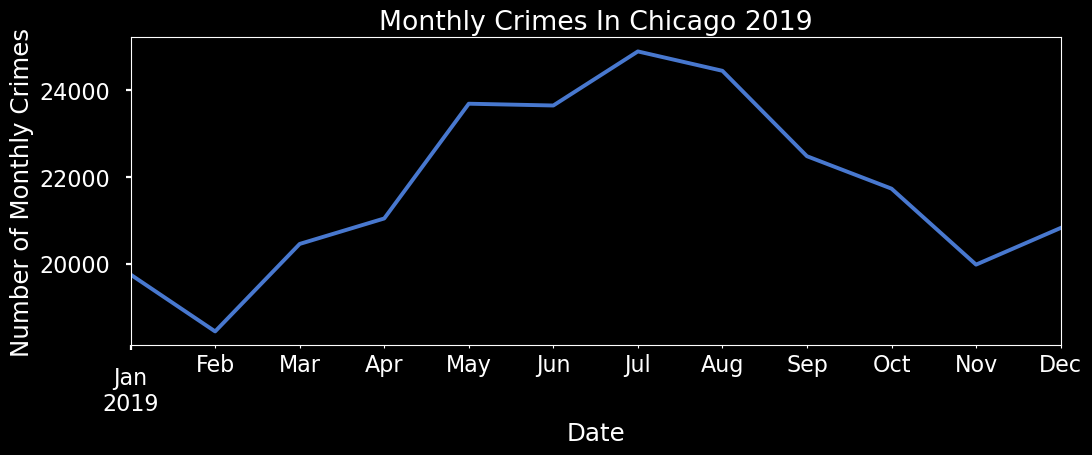

In [23]:
year = 2019

ts = time.loc[f"{year}"].resample("M").sum()
ax = ts["Crime"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Crimes")
ax.set_title(f"Monthly Crimes In Chicago {year}")

Text(0.5, 1.0, 'Monthly Crimes In Chicago 2018')

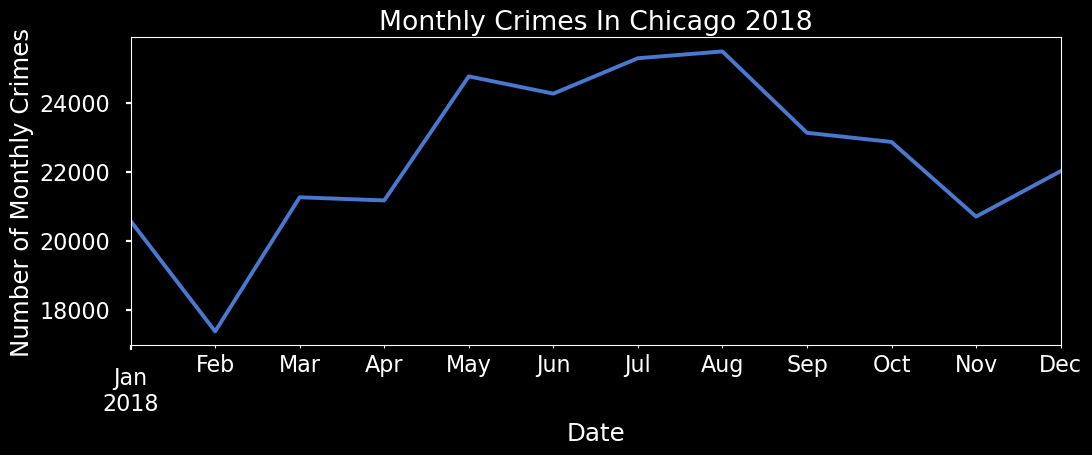

In [24]:
year = 2018

ts = time.loc[f"{year}"].resample("M").sum()
ax = ts["Crime"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Crimes")
ax.set_title(f"Monthly Crimes In Chicago {year}")

Text(0.5, 1.0, 'Monthly Crimes In Chicago 2017')

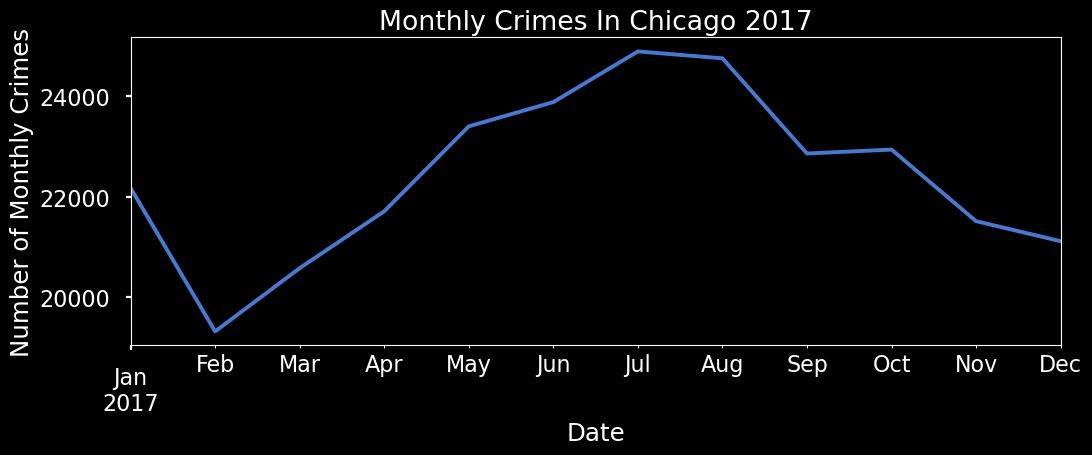

In [25]:
year = 2017

ts = time.loc[f"{year}"].resample("M").sum()
ax = ts["Crime"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Crimes")
ax.set_title(f"Monthly Crimes In Chicago {year}")

We can see massive overall decreases in crime during the winter season, primarily in February. The largest increases in crime occur during the summer months in mostly June and August. This trend is quite pronounced.

I will now take a closer look at the three largest crime types in 2022 in order to get a sense of their general trencds seasonally.

Text(0.5, 1.0, 'Commonality of Crimes In Chicago 2017-2022')

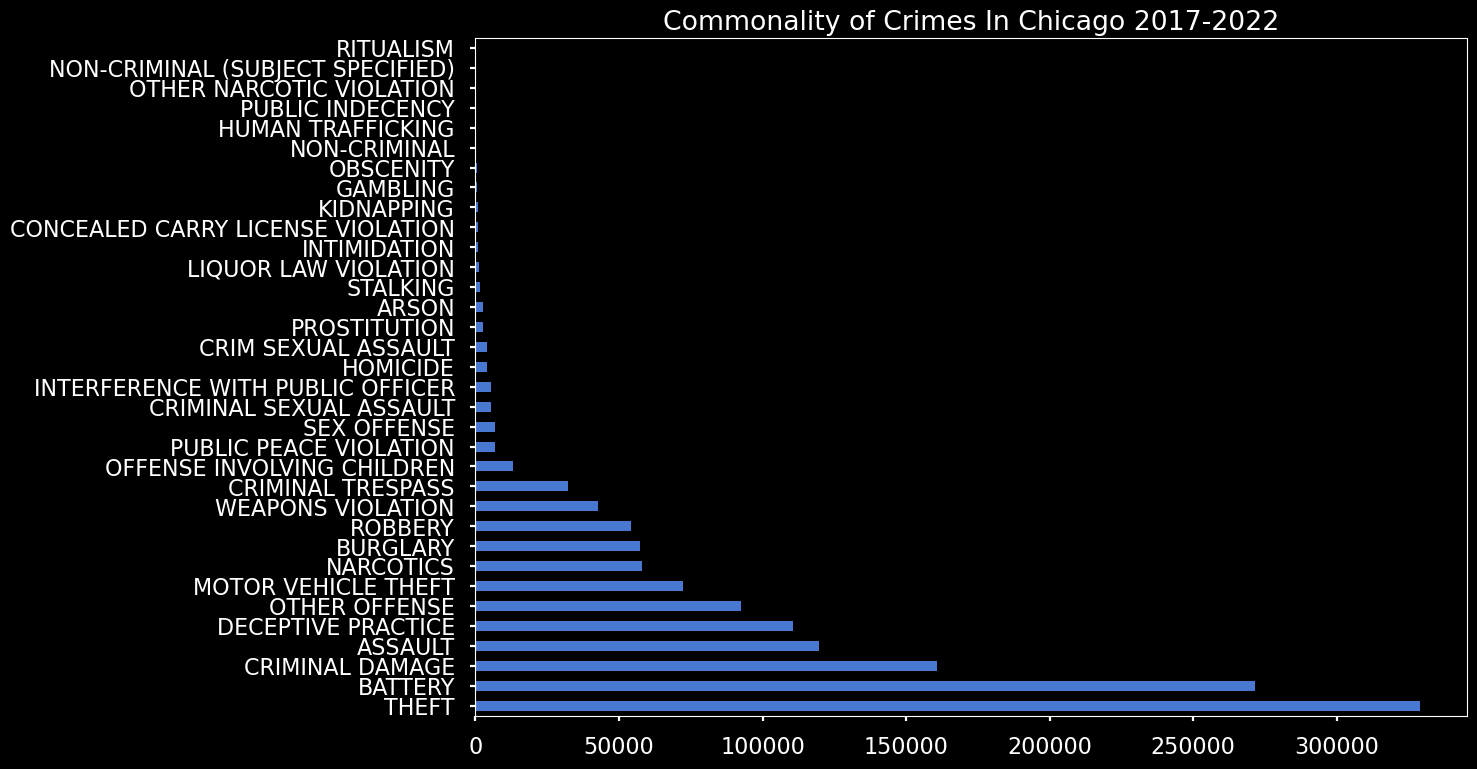

In [26]:
ax = df["Primary Type"].value_counts().plot(kind = "barh")
ax.set_title("Commonality of Crimes In Chicago 2017-2022")

Text(0.5, 1.0, 'Monthly Thefts In Chicago 2022')

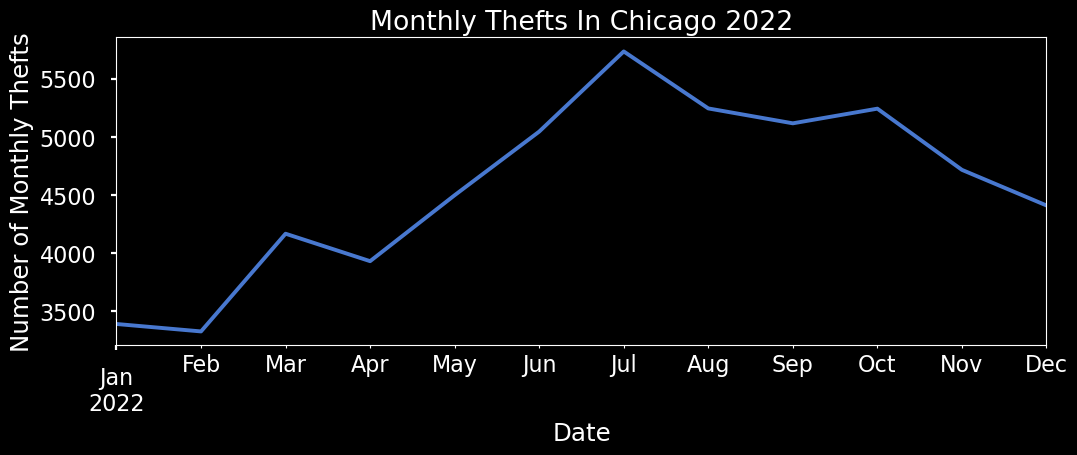

In [27]:
year = 2022

ts = time.loc[f"{year}"]

tc = ts["Primary Type"] == "THEFT"

ts = ts[tc]

ts = ts.resample("M").sum()

ax = ts["Crime"].plot(figsize=(12,4))
ax.set_ylabel("Number of Monthly Thefts")
ax.set_title(f"Monthly Thefts In Chicago {year}")

Text(0.5, 1.0, 'Monthly Battery Incidents In Chicago 2022')

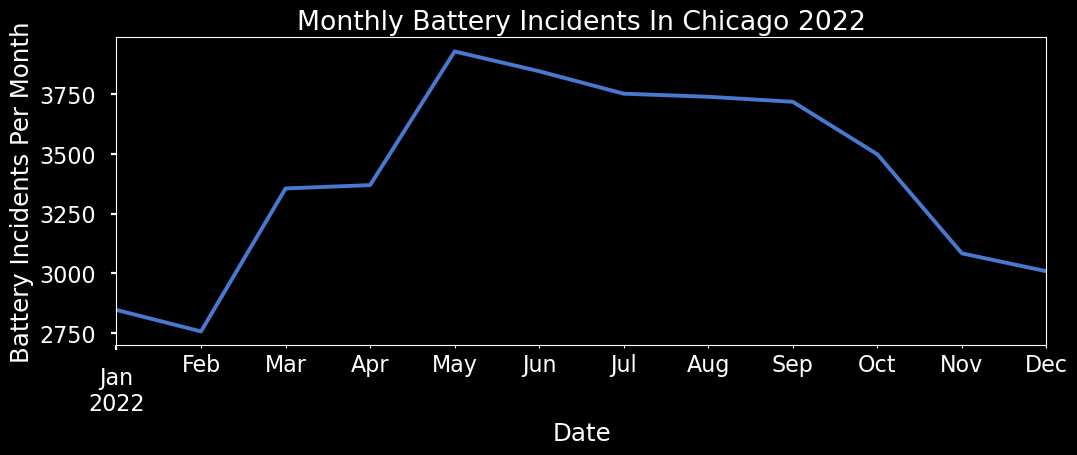

In [28]:
year = 2022

ts = time.loc[f"{year}"]

tc = ts["Primary Type"] == "BATTERY"

ts = ts[tc]

ts = ts.resample("M").sum()

ax = ts["Crime"].plot(figsize=(12,4))
ax.set_ylabel("Battery Incidents Per Month")
ax.set_title(f"Monthly Battery Incidents In Chicago {year}")

Text(0.5, 1.0, 'Monthly Criminal Damage Incidents In Chicago 2022')

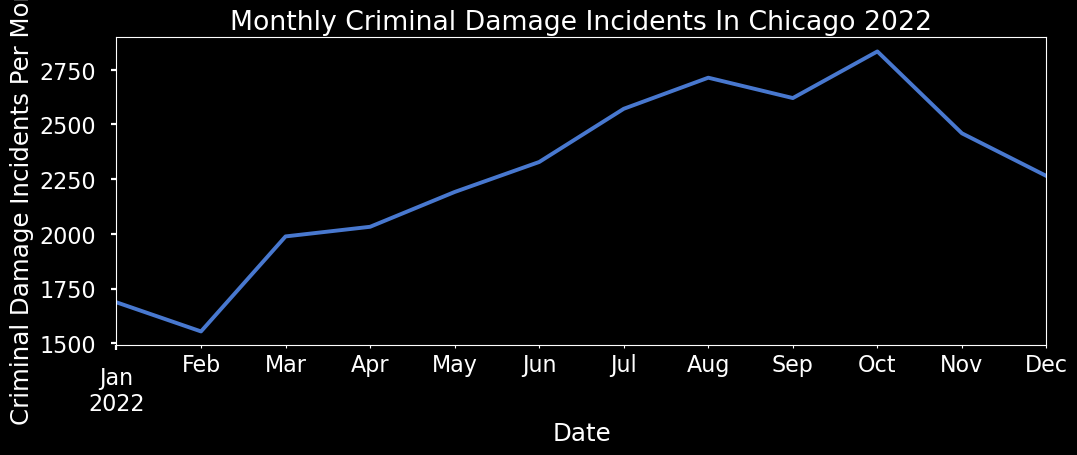

In [29]:
year = 2022

ts = time.loc[f"{year}"]

tc = ts["Primary Type"] == "CRIMINAL DAMAGE"

ts = ts[tc]

ts = ts.resample("M").sum()

ax = ts["Crime"].plot(figsize=(12,4))
ax.set_ylabel("Criminal Damage Incidents Per Month")
ax.set_title(f"Monthly Criminal Damage Incidents In Chicago {year}")

Battery incidents were interesting in 2022 since those had a slight upward trend during spring, which is typically associated with a lower number of crimes overall. 